## Data Bootcamp Final Project: The Relationship Between Private Prisons, Incarceration, and Political Parties in the United States

#### Principal Investigator: [Rachel Rub](https:\\www.rachelrub.com) <br> Email: [rr2875@stern.nyu.edu](rr2875@stern.nyu.edu)

The first private prison in the U.S. came into existance in 1984. Since then, the number of private prisons and people incarcerated in private prisons has increased dramatically. There have been many studies on the quality of private prisons over public prisons, typically looking at internal variables such as financing, security and opperations. There is a lot of controversy regarding the ethics of private prisons, as well as their quality. However, there has been less exploration of the broad, macro-level trends of private prisons, specifically in relation to all prisons and politics.  

In this project, I will analyze the change in people incarcerated in private prisons over time and people, relative to the change in total people incarcerate. Secondly, I will normalize the number data of people incarcerated by state relative to the population of that state. Finally I will look at where most private prisons are located and see if there is a relationship between the states in which private prisons are concentrated and that state's political leaning. 


The data behind this project comes from the [Bureau of Justice Statistics]('https://www.bjs.gov/index.cfm?ty=nps'), (JBS), for information on incarceration rates, number of private prisons, and location of private prisons; [Pew Research Center]('http://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/#') for information about party affiliation by state.

I will download the data from the [Bureau of Justice Statistics]('https://www.bjs.gov/index.cfm?ty=nps') from their website into an excel sheet. I will do the same for [Pew Research Center]('http://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/#').

## Steps:

** Step One: Private Prisons v. All Prisons in the United States**
First, I will examine the change in number of people in private prisons over time, compared to total people in prisons on a Natinoal level. To do this I will read two data sets from the [Bureau of Justice Statistics]('https://www.bjs.gov/index.cfm?ty=nps'). One contains information on the number of people incarcerating in private prisons over tiem from 1999 to 2016. The other data set contains information on the number of people incarcerated in all prisons over time from 1999 to 2016. This data set contains indevidual state data, state prison data, federal prison data, and total data regarding people incarcerated in private prisons.  For this part I will only be looking at the national statistics, not indevidiual state statistics.  



**Step Two: Private Prisons v. All Prisons by State** 
Next, I will be using that same private prison data set from the [Bureau of Justice Statistics]('https://www.bjs.gov/index.cfm?ty=nps'), as well as the Census API. I will be using the Census API to access state population from 2015. For this section I will be examining the number of private prisons in each state. I will use the population data from the Census API to normalize the number of people in private prisons relative to that state's popualtion. 


**Step Two: Location of Private Prisons v. Political Leaning by State**
Finally, I will be comparing the location of private prisons in the United States to the political leaning of that state. I will be using data from [Pew Research Center]('http://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/#') for state political leaning and the normalized data from Step Two. 


In [432]:
# Here I am importing the packages that I need
     # This helps displays things nicely
from IPython.display import display, Image

# This is my key tool to manipulate data-set
import pandas as pd 

# Helps plot
import matplotlib.pyplot as plt 

 # Helps numerical operations
import numpy as np
import os


# Needed for geopandas to run which I will be using in Step three
import fiona 

# Main geopandas
import geopandas as gpd

 # Needed for shape-files - Step three
from shapely.geometry import Point, Polygon

# This helps make a nice inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

## Step One: Private Prisons v. All Prisons in the United States

### Private Prison Data
#### First, I am going to read and reformat the data on Private Prisons and All Prisons and then merge them into one, easy to read chart

In [433]:
# Here I am reading the data set from JBS about people in private prisons
private_custody = pd.read_excel('QT_private_prisons_total.xlsx')

In [434]:
# Reformatting - I am only taking the national statistics, not stat by state statistics for this section 
private_custody = private_custody[:4].T.reset_index().drop('index', axis=1).drop([1]).T.set_index([0])

In [435]:
# Reformatting and renaming columns
private_custody = private_custody.T.rename(columns={'Jurisdiction':'Year'})

In [436]:
# This is how it looks so far
private_custody.head()

,Year,U.S. total,Federal/a,State
2,1999,68960,3828,65132
3,2000,91579,15524,76055
4,2001,86421,12736,73685
5,2002,88370,14732,73638
6,2003,90123,16281,73842


In [437]:
# I am making a list to add to private_custody to distinguish what data is refering to people in private prisons
    # versus people in all prisons once I merge the two data sets together
private_type = ['Private', 'Private', 'Private', 'Private',
                'Private', 'Private', 'Private', 'Private',
                'Private', 'Private', 'Private', 'Private',
                'Private', 'Private', 'Private', 'Private',
                'Private', 'Private',]
                

In [438]:
# Adding the list to private_prisons
private_custody['Prison Type'] = private_type

In [439]:
# Reformatting
private_custody = private_custody.T.reset_index()

In [440]:
# The data was not perfectly clean, some of the state names had /a at the end of them
    # This is a function to eliminate /a from the end of the State names
for i in private_custody[0]:
    if (i[-2:] == '/a'):
        p = i[0:-2]
        if i[0:-2] == p:
            private_custody[0].replace(to_replace=i, value = p, inplace=True)

In [441]:
# Here it is - ready to merge with the next set, which I am about to go format
private_custody.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,U.S. total,68960,91579,86421,88370,90123,92569,107433,113697,124150,129482,129333,127945,130972,137220,133363,131723,126272,128323
2,Federal,3828,15524,12736,14732,16281,18709,27046,27726,31310,33162,34087,33830,38546,40446,41159,40017,34934,34159
3,State,65132,76055,73685,73638,73842,73860,80387,85971,92840,96320,95246,94115,92426,96774,92204,91706,91338,94164
4,Prison Type,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private


### Total Prison Data

In [442]:
# Reading JBS data set on total people in all prisons
prison_custody = pd.read_excel('QT_custody_prisons_total.xlsx')

In [443]:
# Reformatting, chanign column names
prison_custody = prison_custody[:4].T.reset_index().drop([1]).T.set_index([0]).T.rename(columns={'Inmates '+
                             'in custody of state or'+
                             ' federal correctional facilities, '+
                             'including private prison facilities, '+
                             'December 31, 1999-2016/a': 'Year'}).drop('Jurisdiction', axis=1)

In [444]:
# How it looks so far
prison_custody.head()

,Year,U.S. total,Federal,State
2,1999,1.28156e+06,125682,1.15588e+06
3,2000,1.3173e+06,140064,1.17724e+06
4,2001,1329806,149852,1179954
5,2002,1367361,158216,1209145
6,2003,1394115,168144,1225971


In [445]:
# Same as with private_custody - making a list to distinguish this as data pertaining to ALL prisons
prison_type = ['Total', 'Total', 'Total', 'Total',
              'Total', 'Total', 'Total', 'Total',
              'Total', 'Total', 'Total', 'Total',
              'Total', 'Total', 'Total', 'Total',
              'Total', 'Total']

In [446]:
# Adding to prison_custody
prison_custody['Prison Type'] = prison_type

In [447]:
# Reformatting
prison_custody = prison_custody.T.reset_index()

In [448]:
# Now we are ready to merge prison_custody and private_custody
prison_custody.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,U.S. total,1.28156e+06,1.3173e+06,1329806,1367361,1394115,1421816,1447435,1488380,1513390,1522953,1524650,1521413,1504986,1483913,1485266,1479300,1440722,1417017
2,Federal,125682,140064,149852,158216,168144,177600,186364,190844,197285,198414,205087,206968,214774,216915,214989,209561,195622,188311
3,State,1.15588e+06,1.17724e+06,1179954,1209145,1225971,1244216,1261071,1297536,1316105,1324539,1319563,1314445,1290212,1266998,1270277,1269739,1245100,1228706
4,Prison Type,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total


In [449]:
# Merging prison_custody and private custody into a new data set called tot
tot = prison_custody.merge(private_custody, on=[0], how="outer")

In [450]:
# Reformatting tot and creatting a new variable called total to be the reformatted data frame
total = tot.set_index([0]).T.set_index(['Prison Type', 'Year']).unstack('Prison Type').T

In [451]:
# Transposing 
total = total.T

### Reformatted Chart: Private Prisons v. Total Prisons  
#### This chart contains the U.S. total (i.e both state and federal prisons) as well as the totals for State and Federal prisons independant of eachother

In [452]:
# Here is the final reformatted data set
    # As you can see, this chart is split into three sections - all prisons (U.S. total), 
        # Federal prisons ('Federal'), and State Prisons ('State')
            # From there the data is separated by if Private vs Total (i.e. all prisons) 
total

0           U.S. total              Federal           State             
Prison Type    Private        Total Private   Total Private        Total
Year                                                                    
1999             68960  1.28156e+06    3828  125682   65132  1.15588e+06
2000             91579   1.3173e+06   15524  140064   76055  1.17724e+06
2001             86421      1329806   12736  149852   73685      1179954
2002             88370      1367361   14732  158216   73638      1209145
2003             90123      1394115   16281  168144   73842      1225971
2004             92569      1421816   18709  177600   73860      1244216
2005            107433      1447435   27046  186364   80387      1261071
2006            113697      1488380   27726  190844   85971      1297536
2007            124150      1513390   31310  197285   92840      1316105
2008            129482      1522953   33162  198414   96320      1324539
2009            129333      1524650   34087  205087   95246      1319563
2010            127945      1521413   33830  206968   94115      1314445
2011            130972      1504986   38546  214774   92426      1290212
2012            137220      1483913   40446  216915   96774      1266998
2013            133363      1485266   41159  214989   92204      1270277
2014            131723      1479300   40017  209561   91706      1269739
2015            126272      1440722   34934  195622   91338      1245100
2016            128323      1417017   34159  188311   94164      1228706

### Normalized Data
#### Next,  I am going to normalize each column against its own minimum and maximum to create a range between 0 and 1 so that the data is easier to analyze

In [453]:
# These are functions that will populate the lists below with the normalized values of each column
        # That way I can join the lists together to create a new data frame with the normalized data

tot_p = []
tot_t = []

fed_p = []
fed_t = []

sta_p = []
sta_t = []

for item in total['U.S. total'].Private:
    mn = total['U.S. total'].Private.min()
    mx = tot_p_max = total['U.S. total'].Private.max()
    p = (item - mn)/(mx - mn)
    tot_p.append(p)
for item in total['U.S. total'].Total:
    mn = total['U.S. total'].Total.min()
    mx = tot_p_max = total['U.S. total'].Total.max()
    p = (item - mn)/(mx - mn)
    tot_t.append(p)
for item in total['Federal'].Private:
    mn = total['Federal'].Private.min()
    mx = tot_p_max = total['Federal'].Private.max()
    p = (item - mn)/(mx - mn)
    fed_p.append(p)
for item in total['Federal'].Total:
    mn = total['Federal'].Total.min()
    mx = tot_p_max = total['Federal'].Total.max()
    p = (item - mn)/(mx - mn)
    fed_t.append(p)
for item in total['State'].Private:
    mn = total['State'].Private.min()
    mx = tot_p_max = total['State'].Private.max()
    p = (item - mn)/(mx - mn)
    sta_p.append(p)
for item in total['State'].Total:
    mn = total['State'].Total.min()
    mx = tot_p_max = total['State'].Total.max()
    p = (item - mn)/(mx - mn)
    sta_t.append(p)

In [454]:
# This is the dataframe I am creating with the above lists
normal = pd.DataFrame({'USA_Private': tot_p, 'USA_Total': tot_t, 'Fed_Private': fed_p, 'Fed_'+
                       'Total': fed_t, 'State_Private': sta_p, 'State_Total': sta_t,})

In [455]:
# Here is what the data frame looks like
    # This is the number of people incarcerated over time, normalized to each columns own data

normal

,Fed_Private,Fed_Total,State_Private,State_Total,USA_Private,USA_Total
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.313305,0.157640,0.345206,0.126656,0.331365,0.147040
2,0.238622,0.264926,0.270305,0.142748,0.255801,0.198470
3,0.292090,0.356603,0.268820,0.315823,0.284354,0.352960
4,0.333583,0.465424,0.275267,0.415585,0.310035,0.463018
5,0.398623,0.569070,0.275836,0.523761,0.345869,0.576971
6,0.621950,0.665132,0.482112,0.623695,0.563624,0.682360
7,0.640165,0.714237,0.658587,0.839898,0.655391,0.850796
8,0.736171,0.784837,0.875672,0.949994,0.808526,0.953680
9,0.785781,0.797212,0.985652,1.000000,0.886639,0.993019


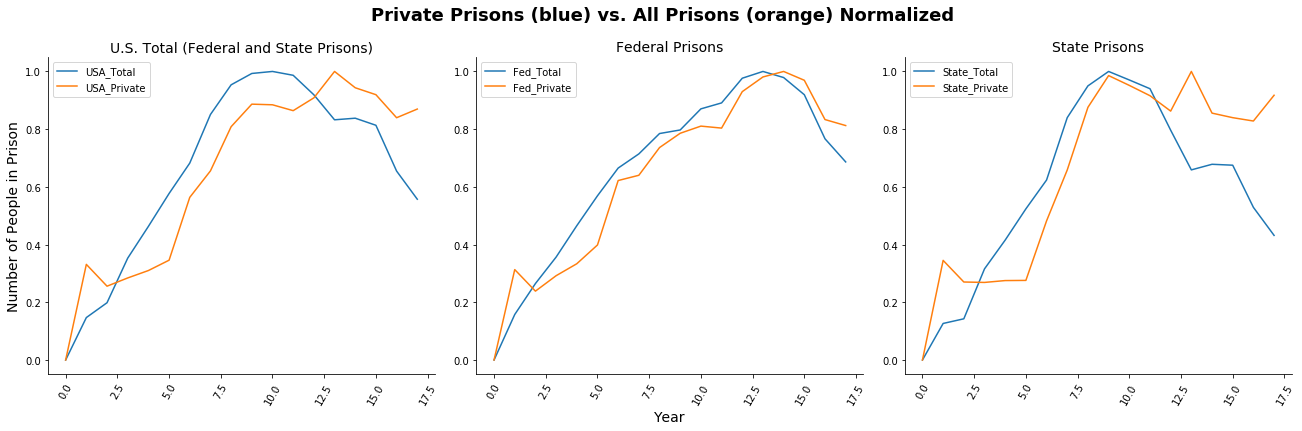

In [533]:
# These are three graphs showing the number of people in all prisons and only private over time, 
    # separated by all prisons, Federal prisons, and State prisons

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

fig.tight_layout()

ax[0].plot(normal['USA_Total'])
ax[0].plot(normal['USA_Private'])

ax[1].plot(normal['Fed_Total'])
ax[1].plot(normal['Fed_Private'])

ax[2].plot(normal['State_Total'])
ax[2].plot(normal['State_Private'])


ax[0].tick_params(axis='x', rotation=60)
ax[1].tick_params(axis='x', rotation=60)
ax[2].tick_params(axis='x', rotation=60)

# Eliminating the upper and right frame of the graphs
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)


ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)

ax[0].set_ylabel("Number of People in Prison", fontsize=14)
ax[1].set_xlabel("Year", fontsize=14)

# Labeling each graph
ax[0].set_title('U.S. Total (Federal and State Prisons)', fontsize=14)
ax[1].set_title('Federal Prisons', fontsize=14)
ax[2].set_title('State Prisons', fontsize=14)

# Labeling the whole thing
fig.suptitle("Private Prisons (blue) vs. All Prisons (orange) Normalized", 
             fontsize=18, fontweight='bold', y = 1.1)

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.show()

## Step Two: Private Prisons v. All Prisons by State
### In this step I am going to use the same data set, but this time I will be looking at the data on a state level rather than a national level

In [457]:
# Reading the data set into a new variable
state_private = pd.read_excel('QT_private_prisons_total.xlsx')

In [458]:
# Reformatting - this time saving only the state data
state_private = state_private.T.reset_index().drop(['ind'+
                'ex', 1, 2, 3, 55, 56, 57, 58, 59, 60, 61, 62], axis = 1).drop([0])

In [459]:
state_private = state_private.set_index([0]).T

In [460]:
# This is a function to rid any of the state names of additional characters they may have at the end 
p=[]
for i in (state_private.Year):
    if (i[-2:] == '/b') or (i[-2:] == '/e'):
        p = i[0:-2]
        if i[0:-2] == p:
            state_private.Year.replace(to_replace=i, value = p, inplace=True)

In [461]:
# Cleaning up the data set to make sure all values are numbers
state_private.replace(to_replace="/", value=0, inplace = True)
state_private.replace(to_replace="--", value=0, inplace=True)
state_private.replace(to_replace=".", value=0, inplace=True)

In [462]:
# Filling empty cells with 0
state_private.fillna(0, inplace=True)

In [463]:
# Making sure column headers are strings to access them more easily
state_private.columns = state_private.columns.map(str)
state_private = state_private.rename(columns={'1999.0':'1999'})

In [464]:
state_private.set_index('Year', inplace=True)

### Normalized Data
#### For this section, I am normalizing the data based on population size to get a better representation of the relative number of people incarcerated in private prisons as compared to all prisons
#### For this step I am utilizing the Census API to pull population data - due to the data available with this API and the scope of this project, I am only looking at 2015 for this section

In [465]:
# Here I am importing the Census API
from census import Census
from us import states

In [466]:
# This is my api_key
my_api_key = '34e40301bda77077e24c859c6c6c0b721ad73fc7'

# object c has methods associated with it to use the Census API
c = Census(my_api_key)

In [467]:
# This grabs the geographical name, B01001_001E which is the population
    # This grabs data from all of the States
    
code = ("NAME","B01001_001E") 
state_pop_2015 = c.acs5.get(code, {'for': 'state:* '}, year=2015)

# This creates a data frame with the data I grabbed from the API
state_pop_2015 = pd.DataFrame(state_pop_2015)

# Here I renamed B01001_001E
state_pop_2015.rename(columns={'B01001_001E':'Pop_2015'}, inplace=True)

In [468]:
# Here I am merging state_pop_2015 with state_private
state_private = state_private.reset_index().merge(state_pop_2015, left_on='Year', right_on='NAME', how="outer")

In [469]:
# Reformatting
state_private_2015 = state_private.T.reset_index()[17:21].T.set_index([20]).T.set_index('NAME').T.drop('2016', axis=1)

In [470]:
# Here I am creating a new column in my data frame called norman_2015
    # normal_2015 has the same data about prisoners held in private prisons, relative to population size
state_private_2015['normal_2015'] = state_private_2015['2015']/state_private_2015['Pop_2015']

In [479]:
# Here I am reformatting the private prisons 2015 normalized data set so it can be graphed seamlesly
state_private_2015 = state_private_2015.reset_index()
state_private_2015.columns = state_private_2015.columns.map(str)
state_private_2015.rename(columns={'20':'State'}, inplace=True)

#### Below are two graphs. This first graph was made with 2015 data NOT normalized by population. The second graph WAS made with 2015 data, normalized by population. 

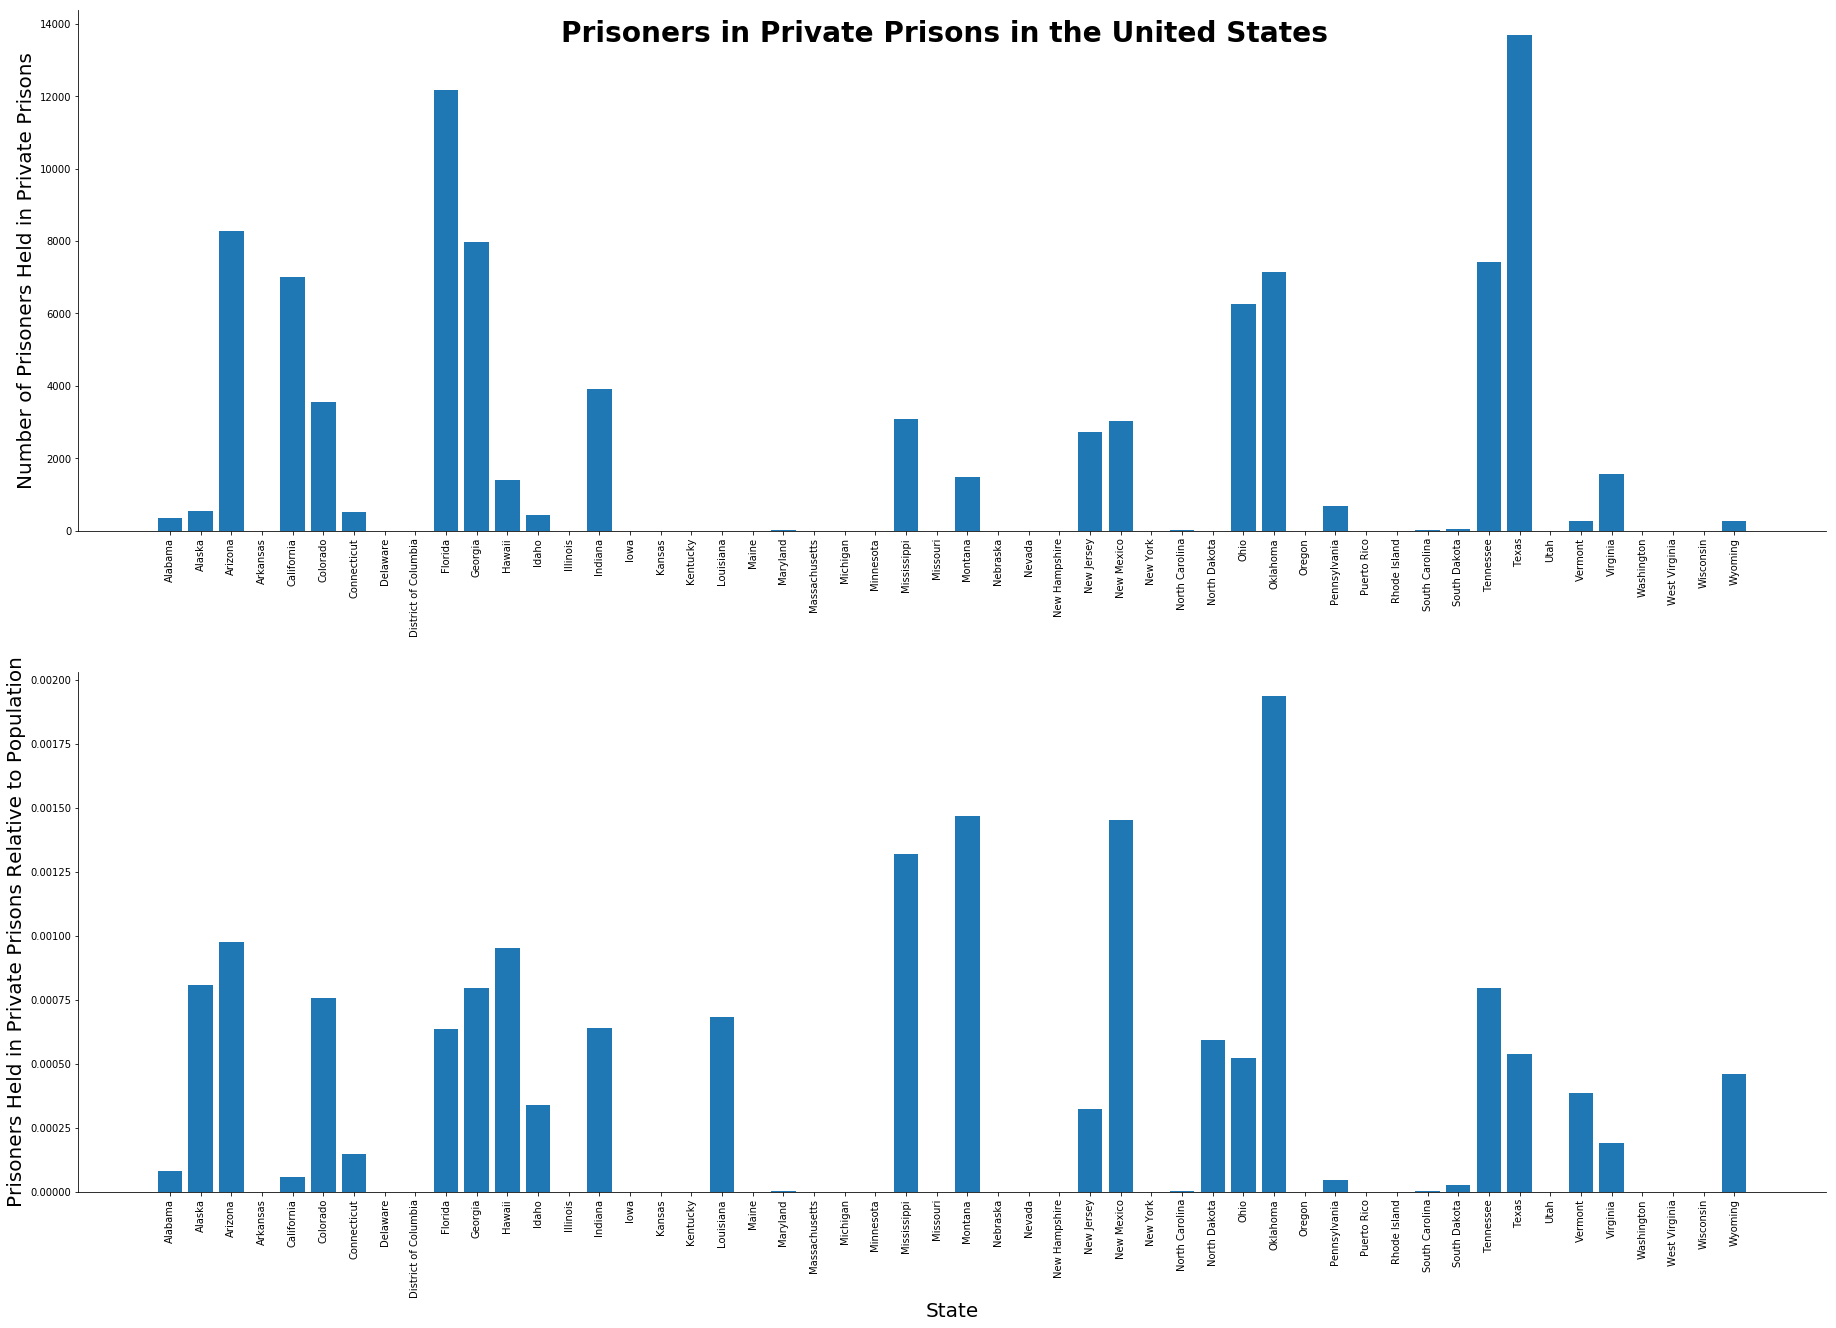

In [480]:
# Creting my graphs in 2 rows and 1 column
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (25,17))

fig.tight_layout(h_pad=12, w_pad=12)

ax[0].bar(state_private_2015['State'], state_private['2016'])
ax[1].bar(state_private_2015['State'], state_private_2015['normal_2015'])

# Rotating the State names on the x-axis
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)

# Making clear names to distinguish between the charts 
ax[0].set_ylabel('Number of Prisoners Held in Private Prisons', fontsize=20) # Set the y label
ax[1].set_ylabel('Prisoners Held in Private Prisons Relative to Population', fontsize=20) # Set the y label

# Making more labels
ax[1].set_xlabel("State", fontsize=20) # Set the x label

# Titling the graphs
fig.suptitle("Prisoners in Private Prisons in the United States", 
             fontsize=28, fontweight='bold')

# Eliminating the upper and right frame of the graphs
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

#California, Florida, Hawaii, Louisiana, Mississippi, Montana, New Mexico, North Dakota

plt.show()

## Step Three: Location of Private Prisons v. Political Leaning by State
### In this step I am going to use data from Pew Research to create a graph that illustrates the political leaning of the States in the United States
### Then, I will use the normalized number of people inprivate prisons in 2015 data from Step Two and create a map that shows which states have the most people incarcerated in private prisons, relative to the population

In [481]:
# Here I am loading the shape file that will enable me to create my Maps
cwd = os.getcwd()
regions_shape = cwd + "/shape_file/USstates/cb_2017_us_state_500k.shx"

In [482]:
regions_shape

'/Users/rachelrub/Documents/DataBootcamp/FinalProject/shape_file/USstates/cb_2017_us_state_500k.shx'

In [483]:
# I am reading the shap file into a data frame I am calling USA_map
USA_map = gpd.read_file(regions_shape)

In [484]:
# Here is what it looks like
USA_map.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ..."
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40...."
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0..."
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4..."
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43..."


In [485]:
# Now, I am loading the data from Pew Research about State political leaning
political_leaning = pd.read_excel('PEW_political_leading.xlsx')

In [486]:
# Here it is
political_leaning.head()

,State,Republican/lean Rep.,No Lean,Democrat/lean Dem.,Sample Size
0,Alabama,0.52,0.13,0.35,511
1,Alaska,0.39,0.29,0.32,310
2,Arizona,0.40,0.21,0.39,653
3,Arkansas,0.46,0.16,0.38,311
4,California,0.30,0.21,0.49,3697


In [487]:
# Now, I am merging the political leaning data with the USA_map data frame
USA_map = USA_map.merge(political_leaning, left_on='NAME', right_on='State', how="outer")

In [488]:
# Here is is, merged
USA_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State,Republican/lean Rep.,No Lean,Democrat/lean Dem.,Sample Size
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ...",West Virginia,0.43,0.16,0.41,309.0
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40....",Illinois,0.33,0.19,0.48,1326.0
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",Maryland,0.31,0.14,0.55,644.0
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4...",Idaho,0.49,0.19,0.32,320.0
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43...",Vermont,0.29,0.14,0.57,306.0


In [489]:
# Here is state_private_2015 from Sept Two
state_private_2015.head()

NAME,index,State,2015,Pop_2015,normal_2015
0,0,Alabama,398,4.83062e+06,8.23911e-05
1,1,Alaska,593,733375,0.00080859
2,2,Arizona,6471,6.64193e+06,0.000974265
3,3,Arkansas,0,2.95821e+06,0
4,4,California,2195,3.84215e+07,5.71295e-05


In [490]:
# Now I am going to merge
USA_map = USA_map.merge(state_private_2015, left_on='NAME', right_on='State', how="outer")

In [491]:
# Here is the fully merged USA_map
USA_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State_x,Republican/lean Rep.,No Lean,Democrat/lean Dem.,Sample Size,index,State_y,2015,Pop_2015,normal_2015
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ...",West Virginia,0.43,0.16,0.41,309.0,48.0,West Virginia,0,1.85142e+06,0
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40....",Illinois,0.33,0.19,0.48,1326.0,13.0,Illinois,0,1.28738e+07,0
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",Maryland,0.31,0.14,0.55,644.0,20.0,Maryland,30,5.93054e+06,5.05856e-06
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4...",Idaho,0.49,0.19,0.32,320.0,12.0,Idaho,545,1.61655e+06,0.000337138
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43...",Vermont,0.29,0.14,0.57,306.0,45.0,Vermont,241,626604,0.000384613


In [492]:
# I am making sure that all the columnns in USA_map are strings so that I can access them more easily
USA_map.columns = USA_map.columns.map(str)

/Users/rachelrub/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


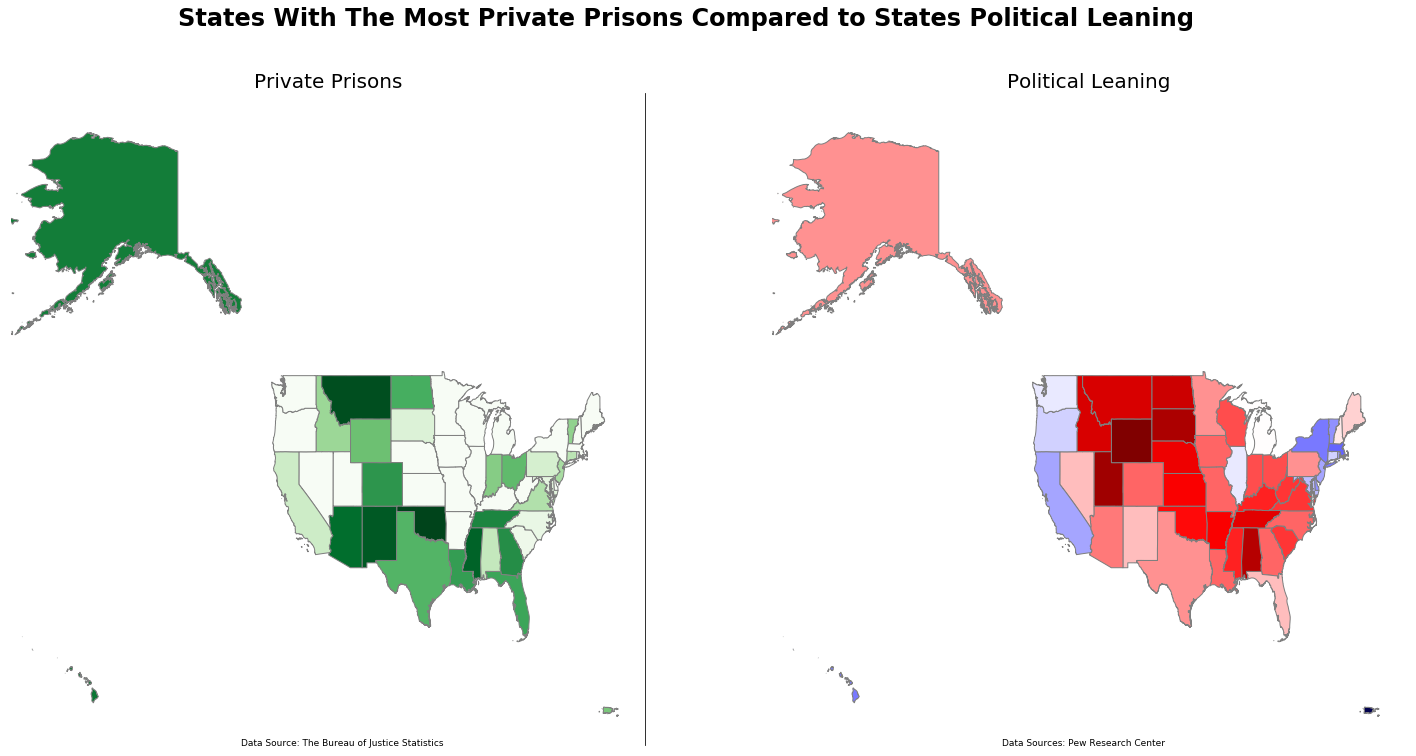

In [493]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(25,12))

# This first map is the map of the number of people incarcerated in private prisons in each state, 
    # relative to the population of that state, in 2015

USA_map.plot(ax = ax[0], # So the geopandas has a built in plot feature, we just pass our "ax to it
             edgecolor='tab:grey',
             column='normal_2015',
             cmap='Greens',
             alpha = 1) # Transparent

# This second map is a dipiction of the political leaning of the United States of America, by state

USA_map.plot(ax = ax[1], # So the geopandas has a built in plot feature, we just pass our "ax to it
             edgecolor='tab:grey',
             column='Republican/lean Rep.',
             cmap='seismic',
             alpha = 1) # Transparent

# Setting the bounds of the map so that it fits the frame better
ax[0].set_xlim([-170, -60])
ax[0].set_ylim([15, 75])

ax[1].set_xlim([-170, -60])
ax[1].set_ylim([15, 75])

# Making the right boarder of the left map visible to separate the maps
ax[0].spines["right"].set_visible(True)

# Making the rest of the boarders invisible 
ax[0].spines["left"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)

ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)

ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

# Labeling the Maps
ax[0].set_title('Private Prisons', fontsize=20)
ax[1].set_title('Political Leaning', fontsize=20)

# Labeling the whole thing
fig.suptitle("States With The Most Private Prisons Compared to States Political Leaning", 
             fontsize=24, fontweight='bold')

# Citing my sources
ax[0].text(-130,15, "Data Source: The Bureau of Justice Statistics",fontsize=9)
ax[1].text(-130,15, "Data Sources: Pew Research Center",fontsize=9)

plt.show()

## Conclusion
My evaluation post analysis:
- **Step 1**: In step one Private prisons and all prisons seem to be traveling along very similar trajectories.
- **Step 2**: In step two, it was apparent how impactful normalizing by state population was in interpreting the data. Some states, like California, went from having being seemingly dominant in its private prison population, however when adjusted to the population of California itself, the significance decreased dramatically. Similarly, state like Montana became more significant upon normalizing the data. There may not be many people in private prisons in Montana, however there simply are ot that many people in Montana, so when population was taken into account, Montana had a higher people in private prisons relative to population ratio. 
- **Step 3**: I was predicting that Republican leaning states would have more people in private prisons. However, while there is quite a bit of overlap between dominant private prison states and Republican leaning states, the graphs are significantly different. 

Next steps would be to delve deeper into the types of prisosn that are private versus the types of prisons that are public, to take into account variables that perhaps contributed to some element of ommitted variable bias in this report. 